# Algoritmo de Metropolis
Arthur Souto Lima - 2018055113

## Imports e Funções Auxiliares

Imports de funções das bibliotecas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from numba import jit

Importar funções auxiliares usadas em atividades anteriores para auxiliar nas computações.

In [24]:
from wang import (energy_ising, # calcula a energia da rede na configuração atual
                  neighbours,   # computa a matriz de vizinhança da rede
                  random_energy_state # cria uma configuração aleatória
                 )

## Algoritmo Metropolis

In [5]:
@jit(nopython=True) 
def expos(beta): 
    """
    Cria um vetor com o cálculo das exponenciais utilizadas.
    Isso economiza tempo nesse tipo de operação
    """
    ex = np.zeros(5,dtype=np.float32) 
    ex[0]=np.exp(8.0*beta) 
    ex[1]=np.exp(4.0*beta)
    ex[2]=0.0 
    ex[3]=np.exp(-4.0*beta) 
    ex[4]=np.exp(-8.0*beta) 
    return ex

In [7]:
@jit(nopython=True)
def mcstep(beta,s,viz,ener,mag):
    """
    Realiza um passo de Monte Carlo na rede s passada, à temperatura beta,
    com vizinhos viz
    """
    N = len(s) 
    ex = expos(beta) 
    for i in range(N): 
        # Soma dos vizinhos
        h = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]]
        
        # Delta de energia se flipar esse sítio
        de = int(s[i]*h*0.5+2)
        
        if np.random.random() < ex[de]:
            # Aceita a nova configuração
            ener = ener+2*s[i]*h 
            mag  -= 2*s[i] 
            s[i] =- s[i]
    return ener,mag,s

In [20]:
@jit(nopython=True)
def metropolis(L, temp, s=None, steps=2000):
    """
    Simula uma rede NxN usando o algoritmo de Metropolis, à temperatura 'temp' (não é o beta)
    Pode receber o estado inicial 's'. Se não fornecido, é escolhido um estado aleatório inicial.
    Retorna dois arrays: energia e magnetização ao longo dos passos do algoritmo
    Por default, são 2000 passos, mas pode ser fornecido outro valor
    """
    # Criação da rede e seus parâmetros
    N = L**2
    beta = 1/temp
    if s is None: s = random_energy_state(N)
    viz = neighbours(N, L)
    ener = energy_ising(s, viz)
    mag = np.abs(np.sum(s))
    
    # Loop principal
    Es, mags = [], []
    Es.append(ener)
    mags.append(mag)
    for i in range(steps):
        ener, mag, s = mcstep(beta, s, viz, ener, mag)
        Es.append(ener)
        mags.append(np.abs(mag))
    return Es, mags

In [153]:
def metropolis_plt(ax, L, temp, qtd, legend=False, s=None, title=None):
    """
    Executa e plota resultados de simulações do algoritmo de Metropolis
    Pode-se definir quantas simulações são feitas com esses mesmos parâmetros
    Pode-se fornecer um estado inicial}
    """
    for i in range(qtd):
        e, m = metropolis(L, temp, s=s)
        ax.plot(e,label=f"Energia {i+1}", alpha=0.7)
        ax.plot(m,label=f"Mag {i+1}", alpha=0.7)
    
    ax.set_title(f"Rede {L}x{L} - T={round(temp,1)}")
    
    if legend:
        # Ordena as legendas
        handles, labels = ax.get_legend_handles_labels()
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.grid()

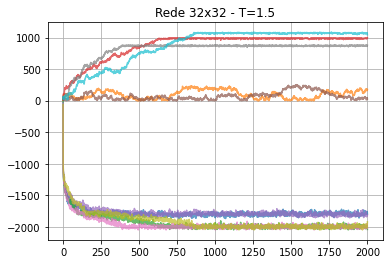

In [154]:
ax = plt.gca()
metropolis_plt(ax, 32, 1.5, 5)

<AxesSubplot:title={'center':'Rede 32x32 - T=1.5'}>

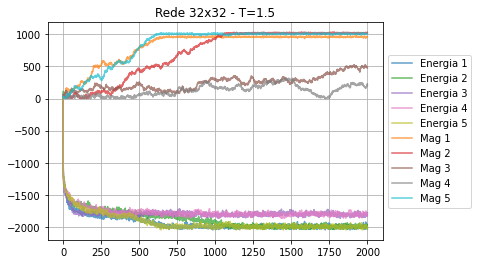

In [143]:
metropolis_plt(32, 1.5, 5)

## Simulações

### Rede 32x32 aleatória

Seguindo o exemplo do enunciado, vamos observar o comportamento de uma rede 32x32, entre 0.4 e 3 de temperatura, partindo sempre de uma configuração aleatória inicial.

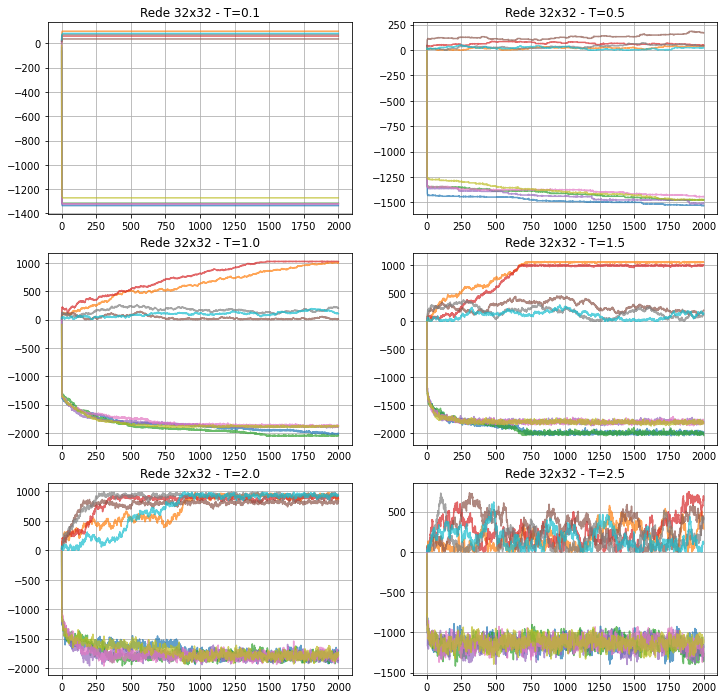

In [171]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
i = 0
for ax in axs.reshape(-1):
    if (i == 0): i = 0.1
    metropolis_plt(ax, 32, i, 5)
    if (i == 0.1): i = 0.5
    else: i += 0.5

- Temp< 0.3 fica tudo reto, de forma bizarra! 
- Temp > 2 não tende a nada mais
- Temp médias eles estabilizam em torno de 750 passos
- Temp crescentes

### Rede 24x24 aleatória

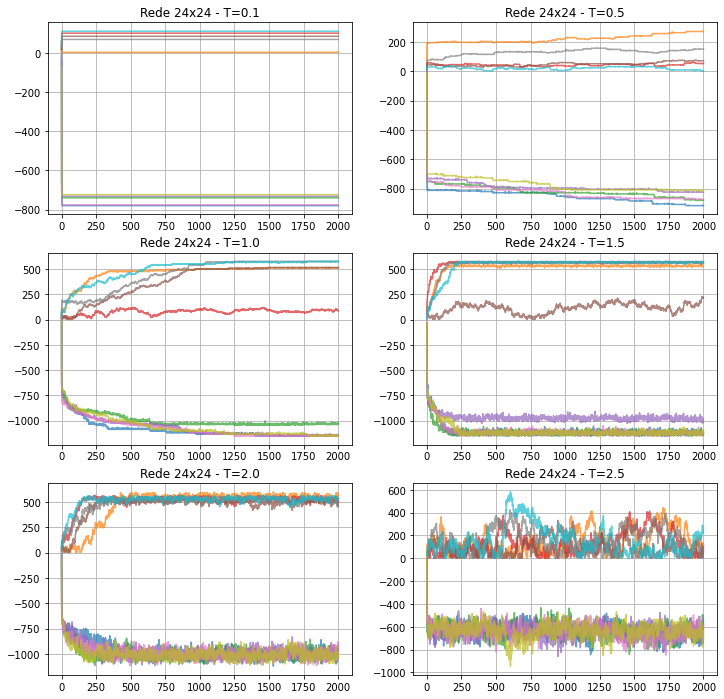

In [172]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
i = 0
L = 24
for ax in axs.reshape(-1):
    if (i == 0): i = 0.1
    metropolis_plt(ax, L, i, 5)
    if (i == 0.1): i = 0.5
    else: i += 0.5

### Rede 100x100 aleatória

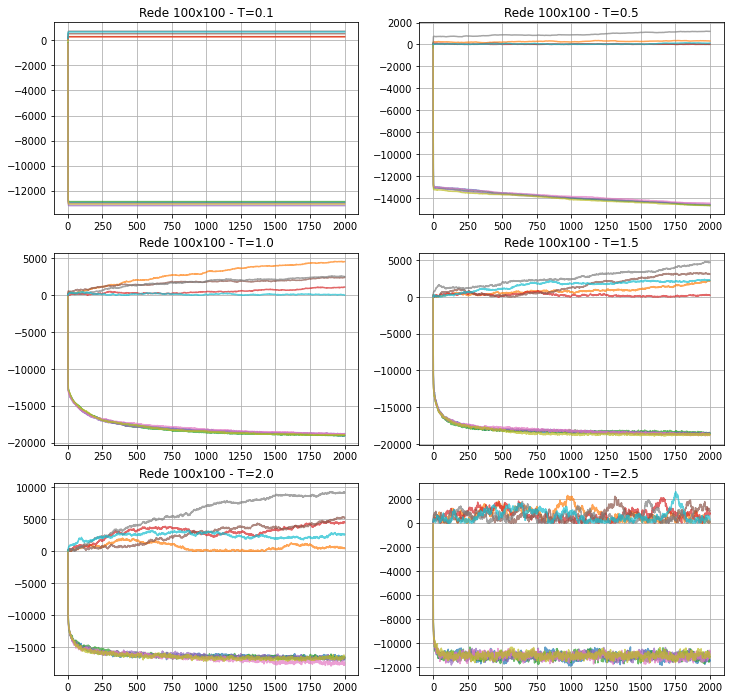

In [173]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
i = 0
L = 100
for ax in axs.reshape(-1):
    if (i == 0): i = 0.1
    metropolis_plt(ax, L, i, 5)
    if (i == 0.1): i = 0.5
    else: i += 0.5

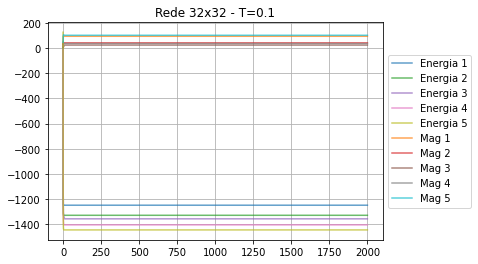

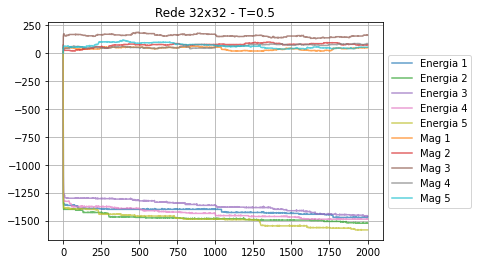

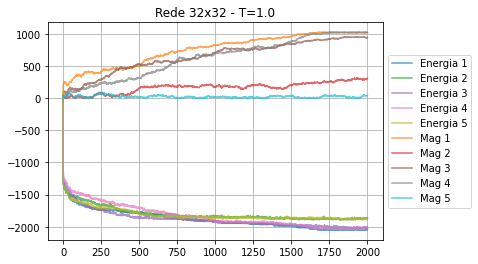

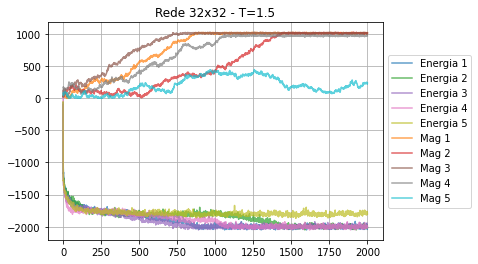

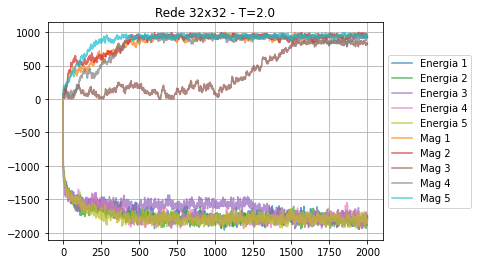

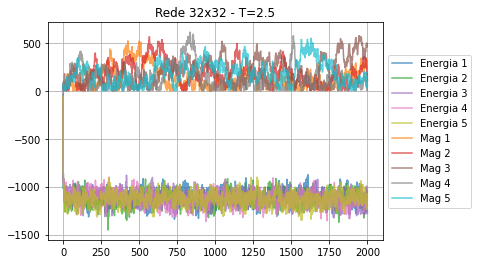

In [141]:
for i in np.arange(0,3,0.5):
    if (i == 0): i = 0.1
    metropolis_plt(32, i, 5)

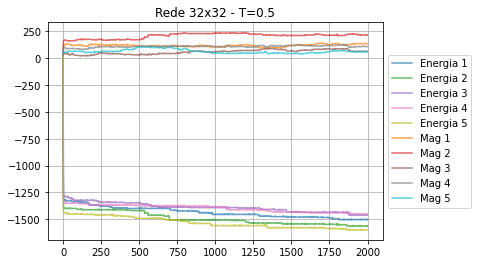

In [135]:
metropolis_plt(32, 0.5, 5)

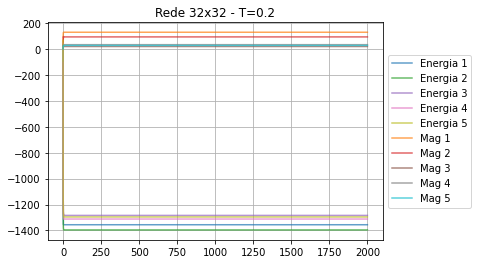

In [136]:
metropolis_plt(32, 0.2, 5)

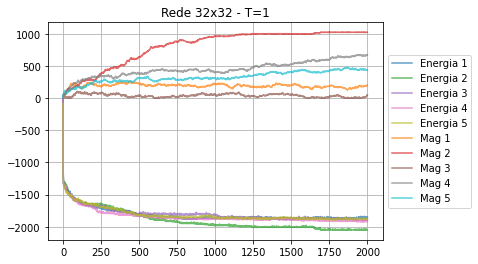

In [137]:
metropolis_plt(32, 1, 5)

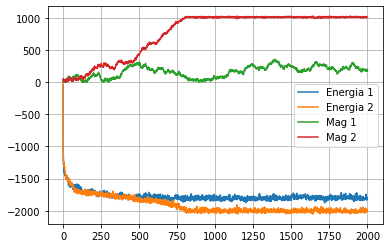

In [74]:
e1, m1 = metropolis(32, 1.5)
e2, m2 = metropolis(32, 1.5)
plt.plot(e1,label="Energia 1")
plt.plot(e2,label="Energia 2")
plt.plot(m1,label="Mag 1")
plt.plot(m2,label="Mag 2")
plt.legend()
plt.grid()
plt.show()

# OFF

In [63]:
@jit(nopython=True)
def mean(vect):
    return np.sum(vect)/len(vect)

In [62]:
@jit(nopython=True)
def metropolis_stable(L, temp, s=None, steps=2000):
    """
    Simula uma rede NxN usando o algoritmo de Metropolis, à temperatura 'temp' (não é o beta)
    Pode receber o estado inicial 's'. Se não fornecido, é escolhido um estado aleatório inicial.
    Retorna dois arrays: energia e magnetização ao longo dos passos do algoritmo
    Por default, são 2000 passos, mas pode ser fornecido outro valor
    """
    # Criação da rede e seus parâmetros
    N = L**2
    beta = 1/temp
    if s is None: s = random_energy_state(N)
    viz = neighbours(N, L)
    ener = energy_ising(s, viz)
    mag = np.abs(np.sum(s))
    
    # Loop principal
    Es, mags = [], []
    Es.append(ener)
    mags.append(mag)
    for i in range(steps):
        ener, mag, s = mcstep(beta, s, viz, ener, mag)
        Es.append(ener)
        mags.append(np.abs(mag))
        if (i % 500 == 0):
            res = stable(Es)
            print(res)
            print(stable(mags))
    return Es, mags

In [64]:
@jit(nopython=True)
def stable(vect, N=3, interval=50, tolerance=1.0):
    """
    Verifica se uma sequência de números estabilizou em torno de uma média.
    O algoritmo avalia médias de segmentos dessa sequência e verifica se as N
    últimas médias são iguais
    """
    if (len(vect) < interval):
        # Vetor menor que intervalo
        interval = int(len(vect)/N)
    
    for i in range(N):
        if (i == 0):
            med0 = np.mean(np.array(vect[-1*interval:]))
            med1 = np.mean(np.array(vect[-2*interval:-interval]))
        else:
            med0 = np.mean(np.array(vect[-(i+1)*interval:-i*interval]))
            med1 = np.mean(np.array(vect[-(i+2)*interval:-(i+1)*interval]))
        if (np.abs(med0 - med1) > tolerance):
            return False
    return True

In [71]:
stable([6,6,6,6,6,6,6,7,6,6,6,6,6,6,6,6,6,6,6,6,])

True

In [11]:
L = 32
N = L**2
temp = 1.5
beta = 1/temp

s = random_energy_state(N)
viz = neighbours(N, L)
ener = energy_ising(s, viz)
mag = np.sum(s)

In [15]:
MAX_STEPS = 100000
Es, mags = [], []

Es.append(ener)
mags.append(mag)

for i in range(MAX_STEPS):
    ener, mag, s = mcstep(beta, s, viz, ener, mag)
    Es.append(ener)
    mags.append(mag)

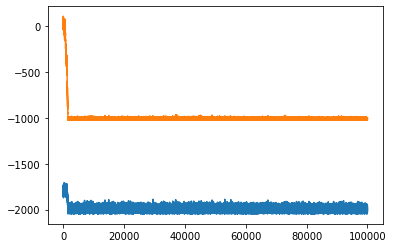

In [16]:
plt.plot(Es)
plt.plot(mags)